In [1]:
import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.imdb.load_data(num_words=200)

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input,train_target
)

In [4]:
import numpy as np
def print_stat(arr):
    array = {
        '평균': np.mean(arr).item(),
        '중앙값': np.median(arr).item(),
        '최댓값': np.max(arr).item(),
        '최솟값': np.min(arr).item(),
        '표준편차': np.std(arr).item(),
        '분산': np.var(arr).item()
    }
    print(array)

In [5]:
lengths = np.array([len(x) for x in train_input])
print_stat(lengths)

{'평균': 238.99178666666666, '중앙값': 178.0, '최댓값': 1854, '최솟값': 11, '표준편차': 176.89462275379606, '분산': 31291.70755920782}


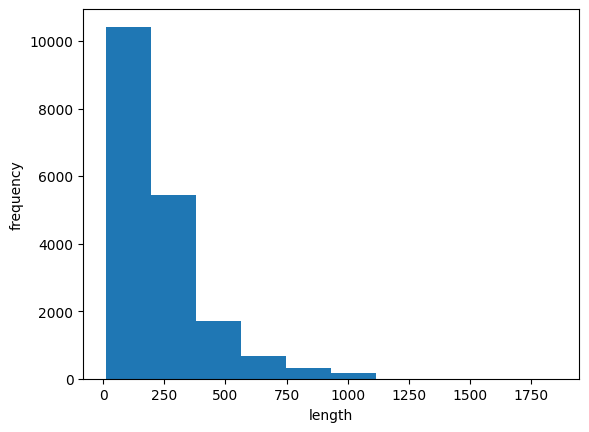

In [6]:
import matplotlib.pyplot as plt

plt.hist(lengths) # 히스토그램 그리기 : 수치의 빈도를 가지고 그래프를 그릴때 
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [7]:
from matplotlib import pyplot as plt


In [8]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [9]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [10]:
train_oh.nbytes

3000000000

In [11]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 옵티마이저, 손실함수, 측정지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [14]:
hist = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5213 - loss: 0.6938 - val_accuracy: 0.6619 - val_loss: 0.6304
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6712 - loss: 0.6154 - val_accuracy: 0.6960 - val_loss: 0.5817
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7077 - loss: 0.5776 - val_accuracy: 0.7163 - val_loss: 0.5640
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7167 - loss: 0.5586 - val_accuracy: 0.6922 - val_loss: 0.6022
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7201 - loss: 0.5601 - val_accuracy: 0.7165 - val_loss: 0.5632
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7285 - loss: 0.5486 - val_accuracy: 0.7158 - val_loss: 0.5622
Epoch 7/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7274 - loss: 0.5424 - val_accuracy: 0.7075 - val_loss: 0.5657
Epoch 8/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7323 - loss: 0.5412 - val

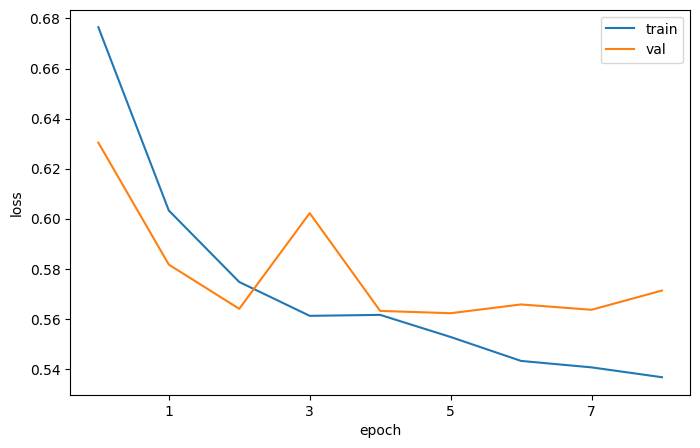

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
epochs = range(1, len(hist.history['loss']), 2)
plt.xticks(epochs)
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
(train_input, train_target),(test_input, test_target) = keras.datasets.imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input,train_target, test_size=0.2, random_state= 42
)

In [38]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [39]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500,16))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 옵티마이저, 손실함수, 측정지표
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [42]:
hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5288 - loss: 0.6903 - val_accuracy: 0.5540 - val_loss: 0.6791
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6261 - loss: 0.6434 - val_accuracy: 0.5770 - val_loss: 0.6729
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6398 - loss: 0.6328 - val_accuracy: 0.6448 - val_loss: 0.6253
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7324 - loss: 0.5446 - val_accuracy: 0.7268 - val_loss: 0.5582
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7709 - loss: 0.4922 - val_accuracy: 0.7530 - val_loss: 0.5304
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7873 - loss: 0.4668 - val_accuracy: 0.7504 - val_loss: 0.5371
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7938 - loss: 0.4568 - val_accuracy: 0.7242 - val_loss: 0.5614
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7966 - loss: 0.4569 - val_acc

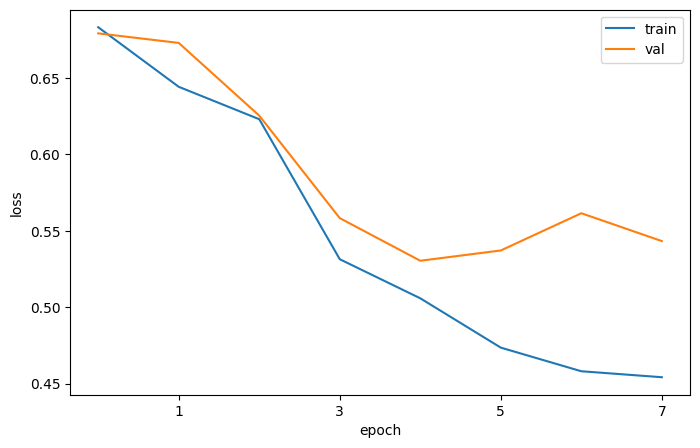

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
epochs = range(1, len(hist.history['loss']) + 1, 2)
plt.xticks(epochs)
plt.ylabel('loss')
plt.legend()
plt.show()